In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("air_quality.csv")
df.head()

,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 05:00:00,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
3,2013-03-01 06:00:00,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
4,2013-03-01 07:00:00,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95685 entries, 0 to 95684
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  95685 non-null  object 
 1   PM2.5      95685 non-null  float64
 2   PM10       95685 non-null  float64
 3   SO2        95685 non-null  float64
 4   NO2        95685 non-null  float64
 5   CO         95685 non-null  float64
 6   O3         95685 non-null  float64
 7   TEMP       95685 non-null  float64
 8   PRES       95685 non-null  float64
 9   DEWP       95685 non-null  float64
 10  RAIN       95685 non-null  float64
 11  wd         95685 non-null  object 
 12  WSPM       95685 non-null  float64
 13  station    95685 non-null  object 
dtypes: float64(11), object(3)
memory usage: 10.2+ MB


In [4]:
df.isna().sum()

date_time    0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
dtype: int64

In [5]:
df.shape

(95685, 14)

In [7]:
pd.to_datetime(df['date_time'])

0       2013-03-01 00:00:00
1       2013-03-01 01:00:00
2       2013-03-01 05:00:00
3       2013-03-01 06:00:00
4       2013-03-01 07:00:00
                ...        
95680   2017-02-28 15:00:00
95681   2017-02-28 16:00:00
95682   2017-02-28 21:00:00
95683   2017-02-28 22:00:00
95684   2017-02-28 23:00:00
Name: date_time, Length: 95685, dtype: datetime64[ns]

In [10]:
df["date_time"]=pd.to_datetime(df['date_time'])

In [11]:
df.dtypes

date_time    datetime64[ns]
PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN                float64
wd                   object
WSPM                float64
station              object
dtype: object

In [17]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['quarter'] = df['date_time'].dt.quarter
df['day_of_week_num'] = df['date_time'].dt.dayofweek
df['day_of_week_name'] = df['date_time'].dt.day_name()

df[['date_time','year','month','day','hour','quarter','day_of_week_num','day_of_week_name']]

,date_time,year,month,day,hour,quarter,day_of_week_num,day_of_week_name
0,2013-03-01 00:00:00,2013,3,1,0,1,4,Friday
1,2013-03-01 01:00:00,2013,3,1,1,1,4,Friday
2,2013-03-01 05:00:00,2013,3,1,5,1,4,Friday
3,2013-03-01 06:00:00,2013,3,1,6,1,4,Friday
4,2013-03-01 07:00:00,2013,3,1,7,1,4,Friday
...,...,...,...,...,...,...,...,...
95680,2017-02-28 15:00:00,2017,2,28,15,1,1,Tuesday
95681,2017-02-28 16:00:00,2017,2,28,16,1,1,Tuesday
95682,2017-02-28 21:00:00,2017,2,28,21,1,1,Tuesday
95683,2017-02-28 22:00:00,2017,2,28,22,1,1,Tuesday


In [18]:
df[["day_of_week_num","day_of_week_name"]].value_counts()

day_of_week_num  day_of_week_name
6                Sunday              13931
5                Saturday            13812
4                Friday              13782
3                Thursday            13633
0                Monday              13536
1                Tuesday             13523
2                Wednesday           13468
Name: count, dtype: int64

In [19]:
df['date_time'].max()

Timestamp('2017-02-28 23:00:00')

In [20]:
df['date_time'].min()

Timestamp('2013-03-01 00:00:00')

In [24]:
df['date_time'].max() - df['date_time'].min()

Timedelta('1460 days 23:00:00')

**Binning**

In [22]:
df["PM2.5"].head()

0    9.0
1    4.0
2    4.0
3    5.0
4    3.0
Name: PM2.5, dtype: float64

<Axes: >

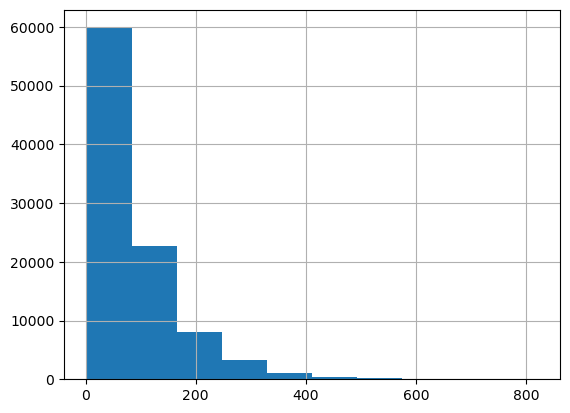

In [23]:
df["PM2.5"].hist()

In [25]:
pd.cut(df["PM2.5"],bins=10)

0        (1.181, 83.9]
1        (1.181, 83.9]
2        (1.181, 83.9]
3        (1.181, 83.9]
4        (1.181, 83.9]
             ...      
95680    (1.181, 83.9]
95681    (1.181, 83.9]
95682    (1.181, 83.9]
95683    (1.181, 83.9]
95684    (1.181, 83.9]
Name: PM2.5, Length: 95685, dtype: category
Categories (10, interval[float64, right]): [(1.181, 83.9] < (83.9, 165.8] < (165.8, 247.7] < (247.7, 329.6] ... (493.4, 575.3] < (575.3, 657.2] < (657.2, 739.1] < (739.1, 821.0]]

In [26]:
pd.cut(df["PM2.5"],bins=10).value_counts()

PM2.5
(1.181, 83.9]     59923
(83.9, 165.8]     22741
(165.8, 247.7]     8132
(247.7, 329.6]     3225
(329.6, 411.5]     1011
(411.5, 493.4]      384
(493.4, 575.3]      171
(575.3, 657.2]       70
(657.2, 739.1]       22
(739.1, 821.0]        6
Name: count, dtype: int64

In [27]:
83.9-1.181

82.71900000000001

In [28]:
pd.cut(df["PM2.5"],bins=[0,12,35.4,55.4,150.4,250.4,999]).value_counts()

PM2.5
(55.4, 150.4]     34257
(12.0, 35.4]      19853
(0.0, 12.0]       13576
(35.4, 55.4]      12457
(150.4, 250.4]    10821
(250.4, 999.0]     4721
Name: count, dtype: int64

In [29]:
pd.cut(df["PM2.5"],
      bins=[0,12,35.4,55.4,150.4,250.4,999],
      labels=["Good",
             "Moderate",
             "Unhealthy for sensitive groups",
             "Unhealthy",
             "Very unhealthy",
             "Hazardous"])

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
95680        Good
95681        Good
95682    Moderate
95683    Moderate
95684    Moderate
Name: PM2.5, Length: 95685, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for sensitive groups' < 'Unhealthy' < 'Very unhealthy' < 'Hazardous']

In [32]:
df["PM2.5_category"]=pd.cut(df["PM2.5"],
                        bins=[0,12,35.4,55.4,150.4,250.4,999],
                          labels=["Good",
                                 "Moderate",
                                 "Unhealthy for sensitive groups",
                                 "Unhealthy",
                                 "Very unhealthy",
                                 "Hazardous"])

In [33]:
df[["PM2.5","PM2.5_category"]]

,PM2.5,PM2.5_category
0,9.0,Good
1,4.0,Good
2,4.0,Good
3,5.0,Good
4,3.0,Good
...,...,...
95680,9.0,Good
95681,10.0,Good
95682,18.0,Moderate
95683,15.0,Moderate


In [35]:
df[["PM2.5_category"]].value_counts()

PM2.5_category                
Unhealthy                         34257
Moderate                          19853
Good                              13576
Unhealthy for sensitive groups    12457
Very unhealthy                    10821
Hazardous                          4721
Name: count, dtype: int64

In [36]:
df[["PM2.5_category"]].value_counts(normalize=True)

PM2.5_category                
Unhealthy                         0.358018
Moderate                          0.207483
Good                              0.141882
Unhealthy for sensitive groups    0.130188
Very unhealthy                    0.113090
Hazardous                         0.049339
Name: proportion, dtype: float64

In [37]:
pd.qcut(df["PM2.5"],q=4)

0        (1.999, 23.0]
1        (1.999, 23.0]
2        (1.999, 23.0]
3        (1.999, 23.0]
4        (1.999, 23.0]
             ...      
95680    (1.999, 23.0]
95681    (1.999, 23.0]
95682    (1.999, 23.0]
95683    (1.999, 23.0]
95684    (1.999, 23.0]
Name: PM2.5, Length: 95685, dtype: category
Categories (4, interval[float64, right]): [(1.999, 23.0] < (23.0, 59.0] < (59.0, 116.0] < (116.0, 821.0]]

In [38]:
pd.qcut(df["PM2.5"],q=4).value_counts()

PM2.5
(1.999, 23.0]     24708
(59.0, 116.0]     23908
(116.0, 821.0]    23645
(23.0, 59.0]      23424
Name: count, dtype: int64

In [40]:
pd.qcut(df["PM2.5"],q=4).value_counts(normalize=True,sort=False)

PM2.5
(1.999, 23.0]     0.258222
(23.0, 59.0]      0.244803
(59.0, 116.0]     0.249862
(116.0, 821.0]    0.247113
Name: proportion, dtype: float64

In [45]:
pd.qcut(df["TEMP"],
      q=5,
      labels=["Very Cold","Cold","Warm","Hot","Very Hot"])

0        Very Cold
1        Very Cold
2        Very Cold
3        Very Cold
4        Very Cold
           ...    
95680         Warm
95681         Warm
95682         Warm
95683         Warm
95684         Cold
Name: TEMP, Length: 95685, dtype: category
Categories (5, object): ['Very Cold' < 'Cold' < 'Warm' < 'Hot' < 'Very Hot']

In [46]:
pd.qcut(df["TEMP"],
      q=5,
      labels=["Very Cold","Cold","Warm","Hot","Very Hot"]).value_counts()

TEMP
Hot          19189
Very Cold    19156
Cold         19154
Warm         19143
Very Hot     19043
Name: count, dtype: int64

In [48]:
df["TEMP_category"]=pd.qcut(df["TEMP"],
                          q=5,
                          labels=["Very Cold","Cold","Warm","Hot","Very Hot"])

In [50]:
df[['TEMP','TEMP_category']]

,TEMP,TEMP_category
0,-0.5,Very Cold
1,-0.7,Very Cold
2,-2.4,Very Cold
3,-2.5,Very Cold
4,-1.4,Very Cold
...,...,...
95680,15.4,Warm
95681,14.9,Warm
95682,10.8,Warm
95683,10.5,Warm
